**Background**

E-commerce companies like AMazon , flipkart uses different recommendation systems to provide suggestions to the customers.Amazon uses currently item-item collaberrative filtering, which scales to massive datasets and produces high quality recommendation system in the real time. This system is a kind of a information filtering system which seeks to predict the "rating" or preferences which user is interested in.


**Introduction to Recommendation systems**


A recommendation engine is a system or algorithm that analyzes user data and provides personalized suggestions or recommendations for items or content that the user may be interested in. These recommendations are based on various factors such as the user's preferences, historical behavior, demographic information, and similarities to other users.

Recommendation engines are commonly used in e-commerce, OTT plateforms , social media, and other online services to enhance user experience and engagement. They help users discover new products, movies, music, articles, or any other items that align with their interests.

Recommeder system creates a similarity between the user and items and exploits the similarity between user/item to make recommendations.

**What recommeder system can solve ?**

1.  It can help the user to find the right product.
2.  It can increase the user engagement. For example, there's 40% more click on the google news due to recommendation.
3.  It helps the item providers to deliver the items to the right user.In Amazon , 35 % products get sold due to recommendation.
4.  It helps to make the contents more personalized.In Netflix most of the rented movies are from recommendations.

**Types of recommendations**

There are mainly 6 types of the recommendations systems :-

1.  Popularity based systems :- It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation.
2.  Classification model based:- It works by understanding the features of the user and applying the classification algorithm to decide whether the user is interested or not in the product.
3. Content based recommedations:- It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.
4. Collaberative Filtering:- It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. it is mainly of two types: a) User-User b) Item -Item

5. Hybrid Approaches:- This system approach is to combine collaborative filtering, content-based filtering, and other approaches .

6. Association rule mining :- Association rules capture the relationships between items based on their patterns of co-occurrence across transactions


**Attribute Information:**

● userId : Every user identified with a unique id

● productId : Every product identified with a unique id

● Rating : Rating of the corresponding product by the corresponding user

● timestamp : Time of the rating ( ignore this column for this exercise)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

The Amazon product review dataset is huge, size of the dataset is 320 MB so it's recommended to download using the Kaggle repository which will be handy for further execution and will save your time and resources.

In [2]:
#load the dataframe and set column name
df=pd.read_csv('cleaned_data.csv')

In [3]:
df.shape

(27899, 6)

In [4]:
df.columns

Index(['asins', 'categories', 'reviews.rating', 'product_name',
       'product_image', 'reviews.username'],
      dtype='object')

Since our dataset is too big and it will be difficult to analyze the entire dataset due to limited resources,thats'why I am randomly taking 20% of the data as sample out of the whole dataset which is 1564896.

In [5]:
#print top 5 records of the dataset
df.head()

,asins,categories,reviews.rating,product_name,product_image,reviews.username
0,B01AHB9CN2,Devices,5.0,AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 G...,/Users/anisnabila/Developer/FYP/FYP2/image/All...,Adapter
1,B01AHB9CN2,Devices,5.0,AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 G...,/Users/anisnabila/Developer/FYP/FYP2/image/All...,truman
2,B01AHB9CN2,Devices,5.0,AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 G...,/Users/anisnabila/Developer/FYP/FYP2/image/All...,DaveZ
3,B01AHB9CN2,Devices,4.0,AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 G...,/Users/anisnabila/Developer/FYP/FYP2/image/All...,Shacks
4,B01AHB9CN2,Devices,5.0,AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 G...,/Users/anisnabila/Developer/FYP/FYP2/image/All...,explore42


In [6]:
#print the concise information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27899 entries, 0 to 27898
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   asins             27897 non-null  object 
 1   categories        27899 non-null  object 
 2   reviews.rating    27867 non-null  float64
 3   product_name      27899 non-null  object 
 4   product_image     27898 non-null  object 
 5   reviews.username  27893 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.3+ MB


In [7]:
df.isna().sum()

asins                2
categories           0
reviews.rating      32
product_name         0
product_image        1
reviews.username     6
dtype: int64

In [8]:
df = df.dropna()

# Check for missing values again
print(df.isna().sum())

asins               0
categories          0
reviews.rating      0
product_name        0
product_image       0
reviews.username    0
dtype: int64


As we can see minimum rating of the products is 1 , maximum rating is 5 and average rating of the products is around 4.

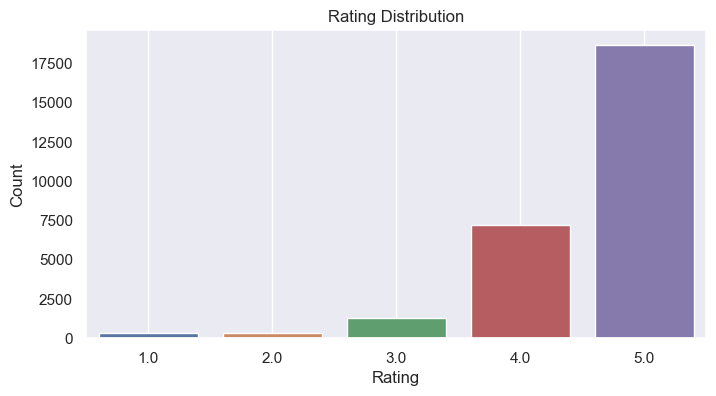

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x='reviews.rating',data=df)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

most of the user have given 5 rating

In [10]:
print('Total rating : ',df.shape[0])
print('Total unique users : ',df['reviews.username'].unique().shape[0])
print('Total unique products : ',df['product_name'].unique().shape[0])

Total rating :  27858
Total unique users :  21841
Total unique products :  47


analyzing the rating by user

In [11]:
no_of_rated_products_per_user = df.groupby(by='reviews.username')['reviews.rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

reviews.username
Mike               109
Chris               72
John                69
Dave                59
Amazon Customer     53
Name: reviews.rating, dtype: int64

In [12]:
print('No of rated product more than 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 50)))

No of rated product more than 50 per user : 6 


**Popularity Based Recommendation**

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user but you cannot recommend items accordingly.

In [13]:
data=df.groupby('product_name').filter(lambda x:x['reviews.rating'].count()>=50)

In [14]:
data.head()

,asins,categories,reviews.rating,product_name,product_image,reviews.username
0,B01AHB9CN2,Devices,5.0,AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 G...,/Users/anisnabila/Developer/FYP/FYP2/image/All...,Adapter
1,B01AHB9CN2,Devices,5.0,AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 G...,/Users/anisnabila/Developer/FYP/FYP2/image/All...,truman
2,B01AHB9CN2,Devices,5.0,AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 G...,/Users/anisnabila/Developer/FYP/FYP2/image/All...,DaveZ
3,B01AHB9CN2,Devices,4.0,AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 G...,/Users/anisnabila/Developer/FYP/FYP2/image/All...,Shacks
4,B01AHB9CN2,Devices,5.0,AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 G...,/Users/anisnabila/Developer/FYP/FYP2/image/All...,explore42


In [15]:
no_of_rating_per_product=data.groupby('product_name')['reviews.rating'].count().sort_values(ascending=False)

In [16]:
no_of_rating_per_product.head()

product_name
Fire Tablet 7 Display WiFi 8 GB  Includes Special Offers Magenta                                   10961
Echo White Echo White                                                                               3308
Amazon Kindle Paperwhite  eBook reader  4 GB  6 monochrome Paperwhite  touchscreen  WiFi  black     3174
AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 GB  Includes Special Offers Magenta                    2812
Amazon Fire Tv Amazon Fire Tv                                                                       2527
Name: reviews.rating, dtype: int64

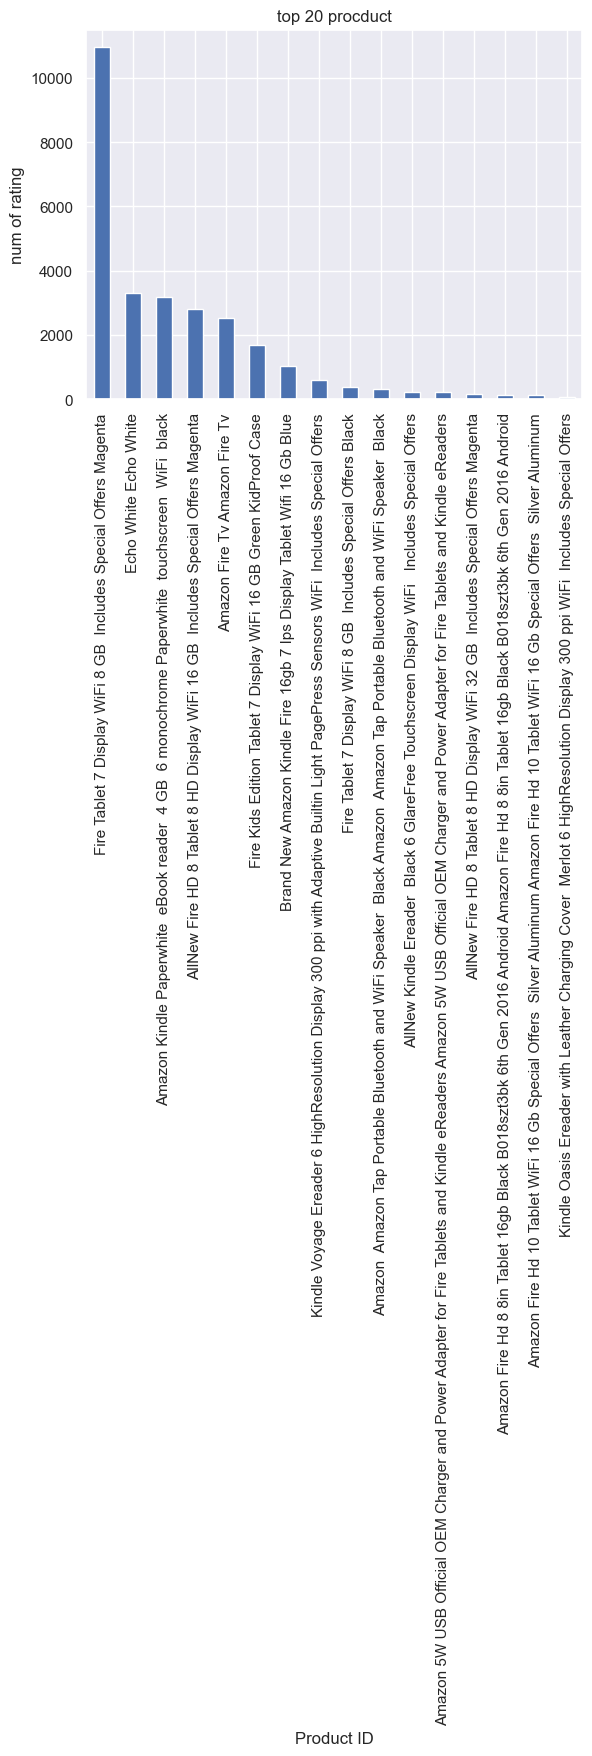

In [17]:
#top 20 product
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('num of rating')
plt.title('top 20 procduct')
plt.show()

In [18]:
#average rating product
mean_rating_product_count=pd.DataFrame(data.groupby('product_name')['reviews.rating'].mean())

In [19]:
mean_rating_product_count.head()

,reviews.rating
product_name,
AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 GB Includes Special Offers Magenta,4.587482
AllNew Fire HD 8 Tablet 8 HD Display WiFi 32 GB Includes Special Offers Magenta,4.568493
AllNew Kindle Ereader Black 6 GlareFree Touchscreen Display WiFi Includes Special Offers,4.429245
Amazon Amazon Tap Portable Bluetooth and WiFi Speaker Black Amazon Amazon Tap Portable Bluetooth and WiFi Speaker Black,4.729560
Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,4.461538


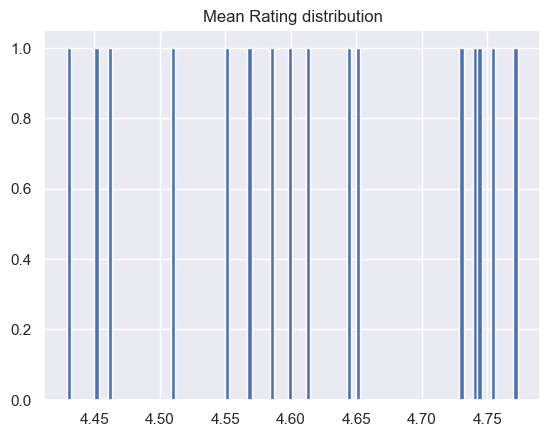

In [20]:
#plot the rating distribution of average rating product
plt.hist(mean_rating_product_count['reviews.rating'],bins=100)
plt.title('Mean Rating distribution')
plt.show()

In [21]:
#check the skewness of the mean rating data
mean_rating_product_count['reviews.rating'].skew()

-0.12039169693155109

In [22]:
#it is highly negative skewed

In [23]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('product_name')['reviews.rating'].count())

In [24]:
mean_rating_product_count.head()

,reviews.rating,rating_counts
product_name,,
AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 GB Includes Special Offers Magenta,4.587482,2812
AllNew Fire HD 8 Tablet 8 HD Display WiFi 32 GB Includes Special Offers Magenta,4.568493,146
AllNew Kindle Ereader Black 6 GlareFree Touchscreen Display WiFi Includes Special Offers,4.429245,212
Amazon Amazon Tap Portable Bluetooth and WiFi Speaker Black Amazon Amazon Tap Portable Bluetooth and WiFi Speaker Black,4.729560,318
Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,4.461538,208


In [25]:
#highest mean rating product
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,reviews.rating,rating_counts
product_name,,
Fire Tablet 7 Display WiFi 8 GB Includes Special Offers Magenta,4.453243,10961


In [26]:
#min mean rating product
print('min average rating product : ',mean_rating_product_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

min average rating product :  67
total min average rating products :  1


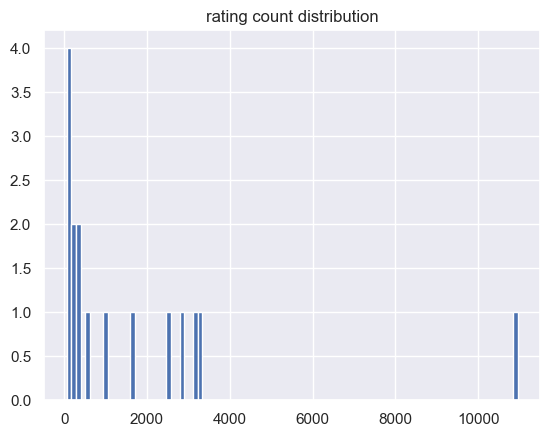

In [27]:
#plot the rating count of mean_rating_product_count
plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

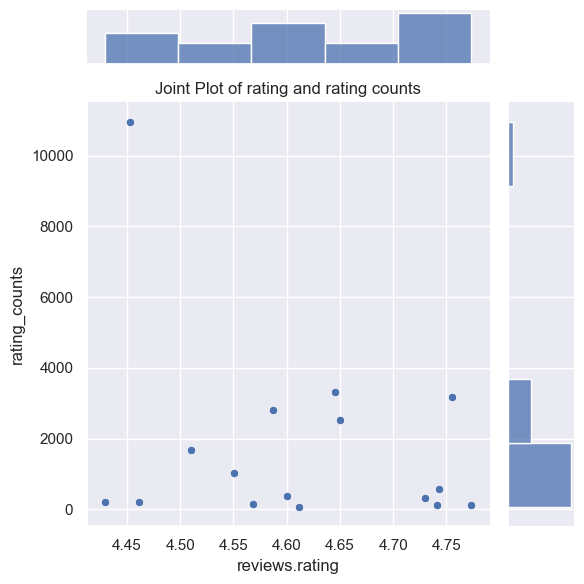

In [28]:
#joint plot of rating and rating counts
sns.jointplot(x='reviews.rating',y='rating_counts',data=mean_rating_product_count)
plt.title('Joint Plot of rating and rating counts')
plt.tight_layout()
plt.show()

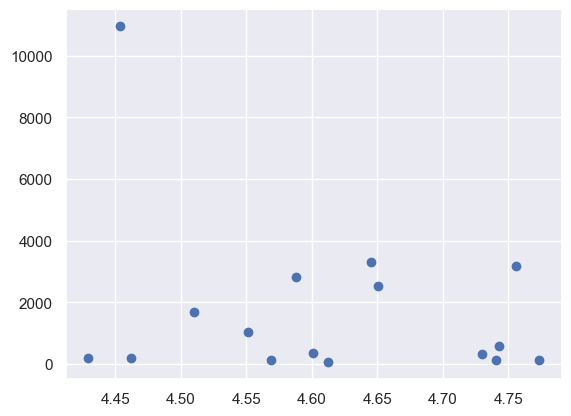

In [29]:
plt.scatter(x=mean_rating_product_count['reviews.rating'],y=mean_rating_product_count['rating_counts'])
plt.show()

In [30]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['reviews.rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Counts is : -0.28740515444301945 


**Collaberative filtering (Item-Item recommedation)**

Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

In [31]:
#import surprise library for collebrative filtering
#check_and_install_library('surprise')
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [32]:
from surprise import Reader, Dataset

# Assuming 'data' is your pandas DataFrame
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(df[['reviews.username', 'product_name', 'reviews.rating']], reader)


In [33]:
#Splitting surprise the dataset into 80,20 ratio using train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.3,random_state=42)

In [34]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [35]:
#make prediction using testset
test_pred=algo.test(testset)

In [36]:
#print RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred ,verbose=True)
accuracy.mae(test_pred ,verbose=True)

Item-based Model : Test Set
RMSE: 0.7797
MAE:  0.5799


0.5799237535026954

Item-based Model : Test Set
RMSE: 0.7797442693732188
MAE: 0.5799237535026954


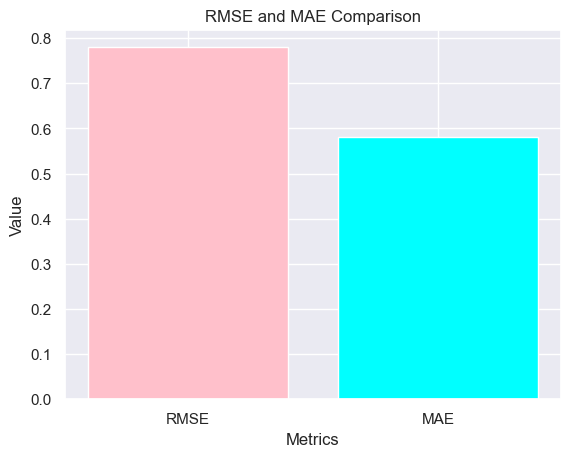

In [37]:
# Calculate RMSE and MAE
rmse = accuracy.rmse(test_pred, verbose=False)
mae = accuracy.mae(test_pred, verbose=False)

# Print RMSE and MAE
print("Item-based Model : Test Set")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Plot the comparison
metrics = ['RMSE', 'MAE']
values = [rmse, mae]

plt.bar(metrics, values, color=['pink', 'cyan'])
plt.title('RMSE and MAE Comparison')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.show()


In [38]:
print(df.groupby('categories')['product_name'].nunique())
print(df.groupby('categories')['product_name'].count())


categories
Devices                18
Devices Accessories     8
Electronics            16
Smart Home             16
Name: product_name, dtype: int64
categories
Devices                17096
Devices Accessories      429
Electronics             4387
Smart Home              5946
Name: product_name, dtype: int64


In [39]:
ratings_matrix = df.pivot_table(values='reviews.rating', index='categories', columns='product_name', fill_value=0)
print(f"Shape of the ratings matrix: {ratings_matrix.shape}")



Shape of the ratings matrix: (4, 47)


**Model-based collaborative filtering system**

These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. They have large coverage, even when working with large sparse matrices.

above we have created a pivot table of the rating where the value of the column will rating and index will be userId and the column name will be productId

In [40]:
#transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

categories,Devices,Devices Accessories,Electronics,Smart Home
product_name,,,,
AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 GB Includes Special Offers Magenta,4.587482,0.000000,0.0,0.00000
AllNew Fire HD 8 Tablet 8 HD Display WiFi 32 GB Includes Special Offers Magenta,4.568493,0.000000,0.0,0.00000
AllNew Kindle Ereader Black 6 GlareFree Touchscreen Display WiFi Includes Special Offers,0.000000,4.429245,0.0,0.00000
Amazon Amazon Tap Portable Bluetooth and WiFi Speaker Black Amazon Amazon Tap Portable Bluetooth and WiFi Speaker Black,0.000000,0.000000,0.0,4.72956
Amazon Fire 16GB 5th Gen 2015 Release Black Amazon Fire 16GB 5th Gen 2015 Release Black,0.000000,0.000000,4.6,0.00000


In [41]:
x_ratings_matrix.shape

(47, 4)

In [42]:
#Decomposition of the matrix using Singular Value Decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=4)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(47, 4)

In [43]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(47, 47)

In [44]:
x_ratings_matrix.index[10]

'Amazon Fire Hd 10 Tablet WiFi 16 Gb Special Offers  Silver Aluminum Amazon Fire Hd 10 Tablet WiFi 16 Gb Special Offers  Silver Aluminum'

In [45]:
i="Echo White Echo White"
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)

32


Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [46]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(47,)

In [47]:
correlation_matrix[correlation_product_ID>0.75].shape

(15, 47)

In [48]:
#Recommending top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.7])
recommend[:10]

['Amazon  Fire 16GB 5th Gen 2015 Release  Black Amazon  Fire 16GB 5th Gen 2015 Release  Black',
 'Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders',
 'Amazon Echo and Fire TV Power Adapter Amazon Echo and Fire TV Power Adapter',
 'Amazon Fire Hd 8 8in Tablet 16gb Black B018szt3bk 6th Gen 2016 Android Amazon Fire Hd 8 8in Tablet 16gb Black B018szt3bk 6th Gen 2016 Android',
 'Amazon Fire Kids Edition Tablet 7 Display WiFi 16 GB Blue KidProof Case  Blue',
 'Amazon Kindle Paperwhite  eBook reader  4 GB  6 monochrome Paperwhite  touchscreen  WiFi  black',
 'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue',
 'Certified Refurbished Amazon Fire TV Stick Previous Generation  1st Certified Refurbished Amazon Fire TV Stick Previous Generation  1st',
 'Certified Refurbished Amazon Fire TV Stick Previous Generation  1st Kindle Paperwhite',
 'Certi

## Recommendation by using Collaborative Filtering 

In [49]:
import numpy as np

def recommend_similar_products(user_choice, correlation_matrix, x_ratings_matrix, threshold=0.5, top_n=20):
    # Get product ID for the user's choice
    product_names = list(x_ratings_matrix.index)
    product_id = product_names.index(user_choice)
    
    # Get correlation scores for the specified product
    correlation_product_ID = correlation_matrix[product_id]
    
    # Get highly correlated product IDs
    highly_correlated_product_ids = np.where(correlation_product_ID > threshold)[0]
    
    # Get top N highly correlated products
    top_similar_products = [product_names[pid] for pid in highly_correlated_product_ids if pid != product_id][:top_n]
    
    return top_similar_products

def display_product_list(product_names):
    print("Available Products:")
    for idx, product in enumerate(product_names, start=1):
        print(f"{idx}. {product}")

def display_recommendations(recommendations):
    print("Top recommended products:")
    for idx, product in enumerate(recommendations, start=1):
        print(f"{idx}. {product}")

# Example usage
product_names = list(x_ratings_matrix.index)
display_product_list(product_names)

# Let the user pick a product
user_choice_idx = int(input("Enter the number of the product you want to find similar products for: ")) - 1
user_choice = product_names[user_choice_idx]

# Recommend similar products based on user's choice
recommendations = recommend_similar_products(user_choice, correlation_matrix, x_ratings_matrix)
display_recommendations(recommendations)


Available Products:
1. AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 GB  Includes Special Offers Magenta
2. AllNew Fire HD 8 Tablet 8 HD Display WiFi 32 GB  Includes Special Offers Magenta
3. AllNew Kindle Ereader  Black 6 GlareFree Touchscreen Display WiFi   Includes Special Offers
4. Amazon  Amazon Tap Portable Bluetooth and WiFi Speaker  Black Amazon  Amazon Tap Portable Bluetooth and WiFi Speaker  Black
5. Amazon  Fire 16GB 5th Gen 2015 Release  Black Amazon  Fire 16GB 5th Gen 2015 Release  Black
6. Amazon  Kindle Voyage  4GB  WiFi  3G  Black Amazon  Kindle Voyage  4GB  WiFi  3G  Black
7. Amazon  Kindle Voyage  4GB  WiFi  3G  Black Fire HD 8 Tablet with Alexa 8 HD Display 16 GB Tangerine  with Special Offers
8. Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders
9. Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eR

Enter the number of the product you want to find similar products for:  2


Top recommended products:
1. AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 GB  Includes Special Offers Magenta
2. Amazon  Kindle Voyage  4GB  WiFi  3G  Black Amazon  Kindle Voyage  4GB  WiFi  3G  Black
3. Amazon  Kindle Voyage  4GB  WiFi  3G  Black Fire HD 8 Tablet with Alexa 8 HD Display 16 GB Tangerine  with Special Offers
4. Amazon Kindle Paperwhite  eBook reader  4 GB  6 monochrome Paperwhite  touchscreen  WiFi  black
5. Amazon Kindle Touch Leather Case 4th Generation  2011 Release Olive Green Amazon Kindle Touch Leather Case 4th Generation  2011 Release Olive Green
6. Amazon Standing Protective Case for Fire HD 6 4th Generation  Black Amazon Standing Protective Case for Fire HD 6 4th Generation  Black
7. Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue
8. Certified Refurbished Amazon Fire TV Previous Generation  1st Certified Refurbished Amazon Fire TV Previous Generation  1st
9. Fire HD 8 Tablet with Alexa 8 HD Display 16 GB Tangerine  with Special Offers
10.

## Recommendation by using Autoencoder 

In [50]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['username_encoded'] = label_encoder.fit_transform(df['reviews.username'])
df['product_name_encoded'] = label_encoder.fit_transform(df['product_name'])

In [51]:
from surprise import Reader, Dataset

# Assuming 'data' is your pandas DataFrame
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(df[['username_encoded', 'product_name_encoded', 'reviews.rating']], reader)


In [52]:
#Define Autoencoder Architecture

num_users = surprise_data.build_full_trainset().n_users
num_items = surprise_data.build_full_trainset().n_items
latent_dim = 33  

In [53]:
#Define Autoencoder Architecture

num_users = surprise_data.build_full_trainset().n_users
num_items = surprise_data.build_full_trainset().n_items
latent_dim = 33  

In [54]:
from keras.layers import Input, Dense

# Assuming input data has shape (None, 42)
input_shape = (42,)  # Update this to match the actual shape of your input data
input_layer = Input(shape=input_shape)
encoded = Dense(33, activation='relu')(input_layer) 


In [55]:
# Decoder
decoded = Dense(input_shape[0], activation='sigmoid')(encoded)


In [56]:
from keras.models import Model

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')


In [57]:
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Input, Dense

# Autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_logarithmic_error')


In [58]:
from surprise.model_selection import train_test_split

# Split the Surprise dataset into train and test sets
trainset_ae, testset_ae = train_test_split(surprise_data, test_size=0.2)

# Assuming num_users and num_items are defined elsewhere
train_data_ae = np.random.rand(1000, 42)  # Example shape, replace with actual data
test_data_ae = np.random.rand(200, 42)


In [59]:
# Assuming trainset is your Trainset object
for user, item, rating in trainset_ae.all_ratings():
    print(f"User: {user}, Item: {item}, Rating: {rating}")


User: 0, Item: 0, Rating: 5.0
User: 1, Item: 0, Rating: 5.0
User: 2, Item: 0, Rating: 5.0
User: 3, Item: 1, Rating: 5.0
User: 4, Item: 2, Rating: 5.0
User: 5, Item: 3, Rating: 5.0
User: 5, Item: 0, Rating: 5.0
User: 5, Item: 6, Rating: 5.0
User: 5, Item: 2, Rating: 3.0
User: 5, Item: 5, Rating: 5.0
User: 5, Item: 5, Rating: 4.0
User: 5, Item: 0, Rating: 4.0
User: 5, Item: 5, Rating: 5.0
User: 5, Item: 2, Rating: 2.0
User: 5, Item: 20, Rating: 5.0
User: 5, Item: 2, Rating: 5.0
User: 5, Item: 16, Rating: 5.0
User: 5, Item: 0, Rating: 4.0
User: 5, Item: 0, Rating: 5.0
User: 5, Item: 5, Rating: 5.0
User: 5, Item: 3, Rating: 4.0
User: 5, Item: 5, Rating: 5.0
User: 5, Item: 2, Rating: 4.0
User: 6, Item: 3, Rating: 5.0
User: 7, Item: 1, Rating: 5.0
User: 8, Item: 2, Rating: 4.0
User: 9, Item: 0, Rating: 5.0
User: 10, Item: 2, Rating: 4.0
User: 11, Item: 4, Rating: 5.0
User: 11, Item: 2, Rating: 5.0
User: 11, Item: 1, Rating: 5.0
User: 11, Item: 5, Rating: 5.0
User: 11, Item: 5, Rating: 5.0
Us

In [60]:
import numpy as np

# Find indices of NaN values in train_data
nan_indices = np.argwhere(np.isnan(train_data_ae))

# Print the indices and corresponding values
for index in nan_indices:
    user, item = index
    value = train_data_ae[user, item]
    print(f"NaN found at User: {user}, Item: {item}, Value: {value}")


In [61]:
# Impute NaN values with the mean of each column
column_means = np.nanmean(train_data_ae, axis=0)
nan_indices = np.argwhere(np.isnan(train_data_ae))

for index in nan_indices:
    user, item = index
    train_data_ae[user, item] = column_means[item]


In [62]:
# Check for NaN values in train_data after imputation
if np.isnan(train_data_ae).any():
    print("Warning: There are still NaN values in the training data after imputation.")
else:
    print("No NaN values found in the training data after imputation.")


No NaN values found in the training data after imputation.


In [63]:
autoencoder.fit(train_data_ae, train_data_ae, epochs=30, batch_size=52)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 0.0430
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.0425
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.0420
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.0414
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 0.0412
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 0.0405
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 0.0408
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.0402
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 0.0400
Epoch 10/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.0398
Epoch 11/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.0395
Epoch 12/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 0.0396
Epoch 13/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 0.0394
Epoch 14/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 0.0394
Epoch 15/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - lo

In [64]:
print("Shape of train_data:", train_data_ae.shape)
print("Number of product id :", train_data_ae.shape[0])
print("Number of product name :", train_data_ae.shape[1])


Shape of train_data: (1000, 42)
Number of product id : 1000
Number of product name : 42


In [65]:
print("Data type of train_data elements:", train_data_ae.dtype)

Data type of train_data elements: float64


In [150]:
def recommend_items_for_user(user_representation, item_representation, user_id, num_recommendations=10, user_interacted_items=None):
    # Check if the user ID is valid
    if user_id < 0 or user_id >= len(user_representation):
        raise ValueError("Invalid user ID")

    # Get the user's representation
    user_representation = user_representation[user_id]

    # Calculate the similarity between the user and all items
    similarity_scores = np.dot(user_representation, item_representation.T)

    # Exclude items the user has already interacted with (if applicable)
    if user_interacted_items:
        similarity_scores[user_interacted_items] = -np.inf

    # Get the indices of items sorted by similarity (in descending order)
    recommended_item_indices = np.argsort(similarity_scores)[::-1]

    # Get the top N recommended items
    top_recommendations = recommended_item_indices[:num_recommendations]

    return similarity_scores, top_recommendations


In [151]:
from sklearn.preprocessing import LabelEncoder

# Assuming autoencoder and other necessary objects are defined
item_representation = autoencoder.layers[1].get_weights()[0].T  # Transpose weights to get item representation
user_representation = autoencoder.layers[2].get_weights()[0]

# User and item ID mappings using LabelEncoder
user_label_encoder = LabelEncoder()
item_label_encoder = LabelEncoder()

# Assuming 'data' is your original dataframe
user_labels = user_label_encoder.fit_transform(df['username_encoded'])
item_labels = item_label_encoder.fit_transform(df['product_name_encoded'])

# Get user input for the user ID with error handling
while True:
    try:
        user_id_to_recommend = int(input("Enter user ID to recommend items: "))
        if user_id_to_recommend in user_labels:
            break
        else:
            print("Invalid user ID. Please enter a valid user ID.")
    except ValueError:
        print("Invalid input. Please enter a valid integer.")

# Call the recommend_items_for_user function
similarity_scores, top_recommendations = recommend_items_for_user(user_representation, item_representation, user_id_to_recommend, num_recommendations=10)

# Display recommendations with original item information
print(f"\nTop Recommendations for User ID {user_label_encoder.inverse_transform([user_id_to_recommend])[0]}:")
for rank, encoded_item_id in enumerate(top_recommendations, start=1):
    original_item_id = item_label_encoder.inverse_transform([encoded_item_id])[0]
    similarity_score = similarity_scores[encoded_item_id]
    print(f"{rank}. {original_item_id} - Similarity Score: {similarity_score:.4f}")


Enter user ID to recommend items:  2



Top Recommendations for User ID 2:
1. 2 - Similarity Score: 3.1399
2. 12 - Similarity Score: 0.4265
3. 23 - Similarity Score: 0.3329
4. 28 - Similarity Score: 0.2614
5. 30 - Similarity Score: 0.2525
6. 11 - Similarity Score: 0.2248
7. 8 - Similarity Score: 0.2056
8. 0 - Similarity Score: 0.1612
9. 21 - Similarity Score: 0.1607
10. 1 - Similarity Score: 0.1607


## Evaluate Model using Autoencoder

In [68]:
# Assuming num_users and num_items are defined elsewhere
num_users = trainset_ae.n_users
num_items = trainset_ae.n_items

# Initialize matrices for train and test data
train_data_ae = np.zeros((num_users, num_items))
test_data_ae = np.zeros((num_users, num_items))

# Convert the trainset into a matrix format
for uid, iid, rating in trainset_ae.all_ratings():
    train_data_ae[int(uid), int(iid)] = rating

# Make predictions for the test set
predictions = algo.test(testset_ae)

# Calculate and print MAE and RMSE
mae = accuracy.mae(predictions)
rmse = accuracy.rmse(predictions)


MAE:  0.5824
RMSE: 0.7473


In [77]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, ndcg_score
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

# Assuming trainset_ae and testset_ae are already defined and contain the data

# Find the maximum user and item IDs in both train and test sets
max_user_id_train = max(int(uid) for uid, _, _ in trainset_ae.all_ratings())
max_item_id_train = max(int(iid) for _, iid, _ in trainset_ae.all_ratings())
max_user_id_test = max(int(uid) for uid, iid, _ in testset_ae)
max_item_id_test = max(int(iid) for uid, iid, _ in testset_ae)

# Calculate the maximum user and item IDs overall
max_user_id = max(max_user_id_train, max_user_id_test)
max_item_id = max(max_item_id_train, max_item_id_test)

# Initialize matrices for train and test data
num_users = max_user_id + 1
num_items = max_item_id + 1

train_data_ae = np.zeros((num_users, num_items))
test_data_ae = np.zeros((num_users, num_items))

# Convert the trainset into a matrix format
for uid, iid, rating in trainset_ae.all_ratings():
    train_data_ae[int(uid), int(iid)] = rating

# Convert the testset into a matrix format
for uid, iid, rating in testset_ae:
    test_data_ae[int(uid), int(iid)] = rating

# Make predictions for the test set
predictions = algo.test(testset_ae)

# Set a threshold for relevance
threshold = 3.0

# Create binary relevance matrices for ground truth and predictions
binary_test_data_ae = (test_data_ae >= threshold).astype(int)

# Create predictions matrix
predicted_ratings_matrix = np.zeros((num_users, num_items))
for uid, iid, true_r, est, _ in predictions:
    predicted_ratings_matrix[int(uid), int(iid)] = est

# Create binary predictions
binary_predicted_ratings_matrix = (predicted_ratings_matrix >= threshold).astype(int)

# Ensure binary_test_data_ae and binary_predicted_ratings_matrix have the same shape
print("Shape of binary_test_data_ae:", binary_test_data_ae.shape)
print("Shape of binary_predicted_ratings_matrix:", binary_predicted_ratings_matrix.shape)

# Flatten the matrices for precision, recall, and F1-score calculations
binary_test_flat = binary_test_data_ae.flatten()
binary_pred_flat = binary_predicted_ratings_matrix.flatten()

# Check lengths
print("Length of binary_test_flat:", len(binary_test_flat))
print("Length of binary_pred_flat:", len(binary_pred_flat))

# Calculate Precision, Recall, F1-Score, and NDCG
precision = precision_score(binary_test_flat, binary_pred_flat)
recall = recall_score(binary_test_flat, binary_pred_flat)
f1 = f1_score(binary_test_flat, binary_pred_flat)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Calculate NDCG
ndcg = ndcg_score([binary_test_flat], [predicted_ratings_matrix.flatten()])

print(f"NDCG: {ndcg}")


Shape of binary_test_data_ae: (21841, 46)
Shape of binary_predicted_ratings_matrix: (21841, 46)
Length of binary_test_flat: 1004686
Length of binary_pred_flat: 1004686
Precision: 0.9760434212988958
Recall: 1.0
F1-Score: 0.987876491759803
NDCG: 0.9965892067152963


In [78]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define input shape based on your data
input_shape = (45,)  # Update this to match the actual shape of your input data
input_layer = Input(shape=input_shape)
encoded = Dense(33, activation='relu')(input_layer)  # Ensure 33 matches your requirement
decoded = Dense(input_shape[0], activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Print the model summary to verify the layers and shapes
autoencoder.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 45)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 33)             │         1,518 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 45)             │         1,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,048 (11.91 KB)

 Trainable params: 3,048 (11.91 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
# Assuming train_data_ae and test_data_ae are your datasets
# Ensure they have the correct shape (number of features should match input_shape)
train_data_ae = np.random.rand(1000, 45)  # Example shape, replace with actual data
test_data_ae = np.random.rand(200, 45)  # Example shape, replace with actual data

# Verify the shape of the data
print("Train data shape:", train_data_ae.shape)
print("Test data shape:", test_data_ae.shape)


Train data shape: (1000, 45)
Test data shape: (200, 45)


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0900 - val_loss: 0.0846
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 0.0840 - val_loss: 0.0829
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 0.0824 - val_loss: 0.0819
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 0.0810 - val_loss: 0.0808
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 0.0797 - val_loss: 0.0793
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 0.0789 - val_loss: 0.0773
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 0.0758 - val_loss: 0.0750
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 0.0737 - val_loss: 0.0726
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.0711 - val_loss: 0.0701
Epoch 10/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.0682 - val_loss: 0.0678
Epoch 11/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 0.0666 - val_loss: 0.0657
Epoch 12/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step -

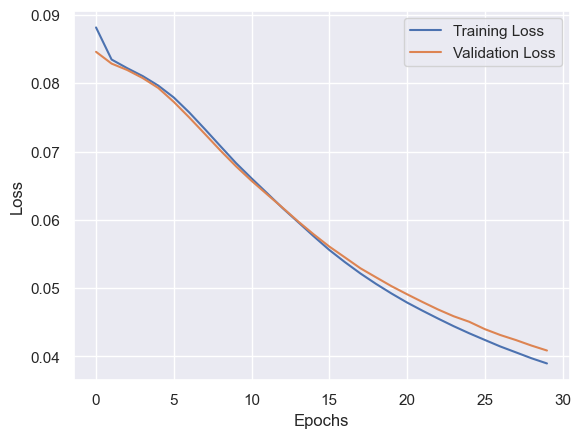

In [80]:
# Train your model and history will contain the loss values over epochs
history = autoencoder.fit(train_data_ae, train_data_ae, 
                          epochs=30, 
                          batch_size=52, 
                          validation_data=(test_data_ae, test_data_ae))

# Plotting loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


The graph shows the training loss and validation loss over 30 epochs for a machine learning model. Here is the interpretation of the graph:

Loss Values: Both training and validation losses start at around 0.09 and decrease over time, indicating that the model is learning and improving its performance.

Convergence: The training loss (blue line) and validation loss (orange line) decrease smoothly and are closely aligned, suggesting that the model is generalizing well to the validation data.

No Overfitting: Since the validation loss is not significantly higher than the training loss and both continue to decrease, it indicates that the model is not overfitting. Overfitting would typically show a divergence where the training loss keeps decreasing, but the validation loss starts to increase.

Good Performance: The decreasing trend in both training and validation losses indicates good model performance. The final loss values are relatively low, implying that the model's predictions are close to the actual values.

The graph shows the training loss and validation loss over 30 epochs for a machine learning model. Here is the interpretation of the graph:

1. **Loss Values**: Both training and validation losses start at around 0.09 and decrease over time, indicating that the model is learning and improving its performance.

2. **Convergence**: The training loss (blue line) and validation loss (orange line) decrease smoothly and are closely aligned, suggesting that the model is generalizing well to the validation data.

3. **No Overfitting**: Since the validation loss is not significantly higher than the training loss and both continue to decrease, it indicates that the model is not overfitting. Overfitting would typically show a divergence where the training loss keeps decreasing, but the validation loss starts to increase.

4. **Good Performance**: The decreasing trend in both training and validation losses indicates good model performance. The final loss values are relatively low, implying that the model's predictions are close to the actual values.

### Summary
The graph indicates that the model training process is going well. The losses are decreasing steadily, and there is no sign of overfitting. The close alignment between training and validation losses suggests the model is effectively learning patterns and generalizing well to unseen data.

## Recommend product using GUI (Autoencoder Model)

In [74]:
from sklearn.preprocessing import LabelEncoder

# Get user input for the user ID with error handling
while True:
    try:
        user_id_to_recommend = int(input("Enter user ID to recommend items: "))
        if user_id_to_recommend in user_labels:
            # Retrieve items previously bought by the user
            previous_purchases = df[df['username_encoded'] == user_label_encoder.inverse_transform([user_id_to_recommend])[0]]['product_name'].unique()

            # Call the recommend_items_for_user function
            similarity_scores, top_recommendations = recommend_items_for_user(user_representation, item_representation, user_id_to_recommend, num_recommendations=10)

            print(f"\nPrevious Purchases for User ID {user_label_encoder.inverse_transform([user_id_to_recommend])[0]}:")
            for previous_purchase in previous_purchases:
                print(f"- {previous_purchase}")

            print(f"\nTop Recommendations for User ID {user_label_encoder.inverse_transform([user_id_to_recommend])[0]}:")
            for rank, encoded_item_id in enumerate(top_recommendations, start=1):
                original_item_id = item_label_encoder.inverse_transform([encoded_item_id])[0]
                similarity_score = similarity_scores[encoded_item_id]
                item_name = df[df['product_name_encoded'] == encoded_item_id]['product_name'].iloc[0]
                print(f"{rank}. {item_name} - Similarity Score: {similarity_score:.4f}")

            break
        else:
            print("Invalid user ID. Please enter a valid user ID.")
    except ValueError:
        print("Invalid input. Please enter a valid integer.")


Enter user ID to recommend items:  2



Previous Purchases for User ID 2:
- Echo White Echo White

Top Recommendations for User ID 2:
1. Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders - Similarity Score: 0.2744
2. Amazon Fire Tv Amazon Fire Tv - Similarity Score: 0.1682
3. Amazon Fire Kids Edition Tablet 7 Display WiFi 16 GB Blue KidProof Case  Blue - Similarity Score: 0.1593
4. Amazon Standing Protective Case for Fire HD 6 4th Generation  Black Amazon Standing Protective Case for Fire HD 6 4th Generation  Black - Similarity Score: 0.1530
5. Amazon Fire Tv Kindle Dx Leather Cover Black fits 97 Display Latest and 2nd Generation Kindle Dxs - Similarity Score: 0.1508
6. Amazon Echo and Fire TV Power Adapter Amazon Echo and Fire TV Power Adapter - Similarity Score: 0.1425
7. AllNew Fire HD 8 Tablet 8 HD Display WiFi 32 GB  Includes Special Offers Magenta - Similarity Score: 0.1

In [75]:
import tkinter as tk
from tkinter import messagebox
from sklearn.preprocessing import LabelEncoder

def recommend_items():
    try:
        user_id_to_recommend = int(entry.get())
        if user_id_to_recommend in user_labels:
            # Retrieve items previously bought by the user
            previous_purchases = df[df['username_encoded'] == user_label_encoder.inverse_transform([user_id_to_recommend])[0]]['product_name'].unique()

            # Call the recommend_items_for_user function
            similarity_scores, top_recommendations = recommend_items_for_user(user_representation, item_representation, user_id_to_recommend, num_recommendations=10)

            # Create a new window for the recommendation results
            result_window = tk.Toplevel(window)
            result_window.title("Recommendation Results")

            # Display previous purchases
            previous_purchases_label = tk.Label(result_window, text=f"\nPrevious Purchases for User ID {user_label_encoder.inverse_transform([user_id_to_recommend])[0]}:\n" + "\n".join(f"- {previous_purchase}" for previous_purchase in previous_purchases))
            previous_purchases_label.pack()

            # Display top recommendations
            top_recommendations_label = tk.Label(result_window, text=f"\nTop Recommendations for User ID {user_label_encoder.inverse_transform([user_id_to_recommend])[0]}:\n")
            top_recommendations_label.pack()

            for rank, encoded_item_id in enumerate(top_recommendations, start=1):
                original_item_id = item_label_encoder.inverse_transform([encoded_item_id])[0]
                similarity_score = similarity_scores[encoded_item_id]
                item_name = df[df['product_name_encoded'] == encoded_item_id]['product_name'].iloc[0]
                recommendation_label = tk.Label(result_window, text=f"{rank}. {item_name} - Similarity Score: {similarity_score:.4f}")
                recommendation_label.pack()

        else:
            messagebox.showerror("Error", "Invalid user ID. Please enter a valid user ID.")
    except ValueError:
        messagebox.showerror("Error", "Invalid input. Please enter a valid integer.")

# Create the main window
window = tk.Tk()
window.title("Recommendation System")

# Create and pack widgets
label = tk.Label(window, text="Enter user ID to recommend items (1-32) :")
label.pack(pady=10)

entry = tk.Entry(window)
entry.pack(pady=10)

button = tk.Button(window, text="Recommend Items", command=recommend_items)
button.pack(pady=10)

# Run the main loop
window.mainloop()


### Recommendation by using LSTM

In [81]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['username_encoded'] = label_encoder.fit_transform(df['reviews.username'])
df['product_name_encoded'] = label_encoder.fit_transform(df['product_name'])

In [82]:
# Load data into Surprise
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(df[['username_encoded', 'product_name_encoded', 'reviews.rating']], reader)

In [83]:
# Build training set and create interaction matrix
trainset = surprise_data.build_full_trainset()
num_users = trainset.n_users
num_items = trainset.n_items
interaction_matrix = np.zeros((num_users, num_items))
for uid, iid, rating in trainset.all_ratings():
    interaction_matrix[int(uid), int(iid)] = rating

In [84]:
# Create a user-item interaction matrix
interaction_matrix = np.zeros((num_users, num_items))
for uid, iid, rating in trainset.all_ratings():
    interaction_matrix[int(uid), int(iid)] = rating

In [85]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assume interaction_matrix is already filled
interaction_matrix = np.expand_dims(interaction_matrix, axis=1)

# Split data into training and test sets
trainX, testX = train_test_split(interaction_matrix, test_size=0.20, random_state=42)


In [86]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from sklearn.model_selection import train_test_split

# Define your LSTM model
model = Sequential([
    LSTM(100, activation='relu', input_shape=(1, interaction_matrix.shape[2])),
    Dense(interaction_matrix.shape[2], activation='relu')  # Adjusting to match the number of features
])
optimizer = Adam(learning_rate=0.001)  # Experiment with this value

model.compile(optimizer='adam', loss='mse')

# Ensure trainX is shaped correctly
print("Shape of trainX:", trainX.shape)  # This should print something like (num_samples, 1, 47)

# Train the model
model.fit(trainX, trainX, epochs=10, batch_size=64)  # Using trainX as both input and target for demonstration

# Predict user preferences
predicted_preferences = model.predict(trainX)

# Function to get top N recommendations for a specific user
def get_top_n_recommendations(user_id, n=10):
    user_preferences = predicted_preferences[user_id].flatten()
    top_n_items = np.argsort(user_preferences)[-n:][::-1]
    return top_n_items

# Example: Get top 10 recommendations for user with ID 0
top_10_recommendations = get_top_n_recommendations(0, n=10)
print("Top 10 recommendations for user 0:", top_10_recommendations)


Shape of trainX: (17472, 1, 47)
Epoch 1/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4495
Epoch 2/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4130
Epoch 3/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4109
Epoch 4/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4087
Epoch 5/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4100
Epoch 6/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4057
Epoch 7/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4084
Epoch 8/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4079
Epoch 9/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4116
Epoch 10/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4063
546/546 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step
Top 10 recommendations for user 0: [10 32 20  0 42 19 17 40 31 21]


In [87]:
# Function to get top N recommendations for a specific user
def get_top_n_recommendations(user_id, n=10):
    user_preferences = predicted_preferences[user_id].flatten()
    top_n_items = np.argsort(user_preferences)[-n:][::-1]
    return top_n_items

# Example: Get top 10 recommendations for user with ID 0
user_id_to_recommend = 0  # Example user ID
top_10_recommendations = get_top_n_recommendations(user_id_to_recommend, n=10)

# Decode product IDs back to original product names
product_name_encoder = LabelEncoder()
product_name_encoder.fit(df['product_name'])
recommended_product_names = product_name_encoder.inverse_transform(top_10_recommendations)

# Retrieve previous purchases for the user
user_label_encoder = LabelEncoder()
user_label_encoder.fit(df['reviews.username'])
user_label = user_label_encoder.inverse_transform([user_id_to_recommend])[0]
previous_purchases = df[df['reviews.username'] == user_label]['product_name'].unique()

# Print previous purchases and top recommendations
print(f"\nPrevious Purchases for User ID {user_label}:")
for previous_purchase in previous_purchases:
    print(f"- {previous_purchase}")

print("\nTop 10 Recommendations:")
for rank, product_name in enumerate(recommended_product_names, start=1):
    print(f"{rank}. {product_name}")



Previous Purchases for User ID .:
- Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders

Top 10 Recommendations:
1. Amazon Fire Hd 10 Tablet WiFi 16 Gb Special Offers  Silver Aluminum Amazon Fire Hd 10 Tablet WiFi 16 Gb Special Offers  Silver Aluminum
2. Echo White Echo White
3. Amazon Kindle Lighted Leather Cover Kindle Keyboard
4. AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 GB  Includes Special Offers Magenta
5. Kindle Oasis Ereader with Leather Charging Cover  Merlot 6 HighResolution Display 300 ppi WiFi  Includes Special Offers
6. Amazon Kindle Lighted Leather Cover Amazon Kindle Lighted Leather Cover
7. Amazon Kindle Fire 5ft USB to MicroUSB Cable works with most MicroUSB Tablets Amazon Kindle Fire 5ft USB to MicroUSB Cable works with most MicroUSB Tablets
8. Kindle Keyboard Kindle Keyboard
9. Echo Black Echo Black
10. Amazon Kindle Paperwhite  eBook re

In [88]:
# Function to get top N recommendations for a specific user
def get_top_n_recommendations(username, n=10):
    # Retrieve user ID from username
    user_label_encoder = LabelEncoder()
    user_label_encoder.fit(df['reviews.username'])
    user_id = user_label_encoder.transform([username])[0]

    user_preferences = predicted_preferences[user_id].flatten()
    top_n_items = np.argsort(user_preferences)[-n:][::-1]
    return top_n_items

# Example: Input username and get top 10 recommendations
username_to_recommend = input("Enter username to recommend items: ")
top_10_recommendations = get_top_n_recommendations(username_to_recommend, n=10)

# Decode product IDs back to original product names
product_name_encoder = LabelEncoder()
product_name_encoder.fit(df['product_name'])
recommended_product_names = product_name_encoder.inverse_transform(top_10_recommendations)

# Retrieve previous purchases for the user
previous_purchases = df[df['reviews.username'] == username_to_recommend]['product_name'].unique()

# Print previous purchases and top recommendations
print(f"\nPrevious Purchases for User {username_to_recommend}:")
for previous_purchase in previous_purchases:
    print(f"- {previous_purchase}")

print("\nTop 10 Recommendations:")
for rank, product_name in enumerate(recommended_product_names, start=1):
    print(f"{rank}. {product_name}")

Enter username to recommend items:  Adapter



Previous Purchases for User Adapter:
- AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 GB  Includes Special Offers Magenta

Top 10 Recommendations:
1. Amazon Fire Hd 10 Tablet WiFi 16 Gb Special Offers  Silver Aluminum Amazon Fire Hd 10 Tablet WiFi 16 Gb Special Offers  Silver Aluminum
2. Echo White Echo White
3. Amazon Kindle Lighted Leather Cover Kindle Keyboard
4. AllNew Fire HD 8 Tablet 8 HD Display WiFi 16 GB  Includes Special Offers Magenta
5. Kindle Oasis Ereader with Leather Charging Cover  Merlot 6 HighResolution Display 300 ppi WiFi  Includes Special Offers
6. Amazon Kindle Lighted Leather Cover Amazon Kindle Lighted Leather Cover
7. Amazon Kindle Fire 5ft USB to MicroUSB Cable works with most MicroUSB Tablets Amazon Kindle Fire 5ft USB to MicroUSB Cable works with most MicroUSB Tablets
8. Kindle Keyboard Kindle Keyboard
9. Echo Black Echo Black
10. Amazon Kindle Paperwhite  eBook reader  4 GB  6 monochrome Paperwhite  touchscreen  WiFi  black


683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


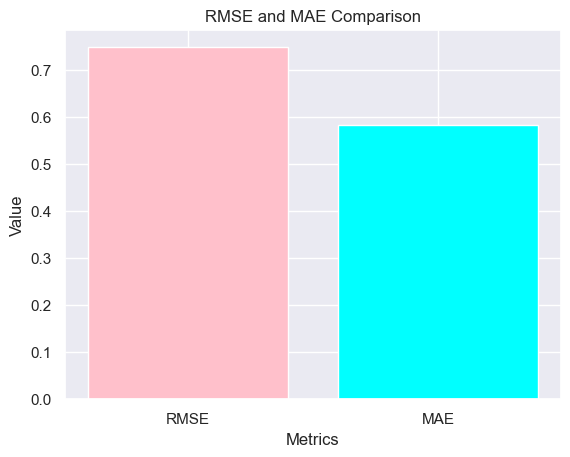

RMSE: 0.4643560726895783
MAE: 0.12732936202944814


In [89]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

test_raw = surprise_data.raw_ratings[-len(surprise_data.raw_ratings) // 4:]  # use the last 25% for testing
testset = surprise_data.construct_testset(test_raw)

# Step 3: Evaluate the Model on the Test Set
# Build the interaction matrix for the test set
test_interaction_matrix = np.zeros((num_users, num_items))
for (uid, iid, rating) in testset:
    test_interaction_matrix[int(uid), int(iid)] = rating

# Reshape the test interaction matrix
test_interaction_matrix = np.expand_dims(test_interaction_matrix, axis=1)

# Predict user preferences
predicted_preferences = model.predict(test_interaction_matrix)

# Step 4: Calculate Evaluation Metrics
# Flatten the matrices for metric calculations
test_interaction_matrix_flat = test_interaction_matrix.flatten()
predicted_preferences_flat = predicted_preferences.flatten()

metrics = ['RMSE', 'MAE']
values = [rmse, mae]

plt.bar(metrics, values, color=['pink', 'cyan'])
plt.title('RMSE and MAE Comparison')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.show()

# Calculate RMSE
rmse = sqrt(mean_squared_error(test_interaction_matrix_flat, predicted_preferences_flat))
print(f"RMSE: {rmse}")

# Calculate MAE
mae = mean_absolute_error(test_interaction_matrix_flat, predicted_preferences_flat)
print(f"MAE: {mae}")



In [90]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score


In [91]:
def calculate_precision(true_items, predicted_items):
    true_positive = len(set(true_items) & set(predicted_items))
    total_predicted_positive = len(predicted_items)
    if total_predicted_positive == 0:
        return 0
    return true_positive / total_predicted_positive

def calculate_recall(true_items, predicted_items):
    true_positive = len(set(true_items) & set(predicted_items))
    total_actual_positive = len(true_items)
    if total_actual_positive == 0:
        return 0
    return true_positive / total_actual_positive

def calculate_f1(precision, recall):
    if (precision + recall) == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)


In [92]:
def calculate_ndcg(true_items, predicted_items, k=10):
    idcg = 1.0 + sum(1.0 / np.log2(i + 2) for i in range(min(len(true_items), k)))
    dcg = 0.0
    for i, pred in enumerate(predicted_items[:k]):
        if pred in true_items:
            dcg += 1.0 / np.log2(i + 2)
    return dcg / idcg


In [97]:
# Assuming 'model' is already defined and trained as per your LSTM setup
predicted_preferences = model.predict(trainX)

def get_top_n_recommendations(user_id, n=10):
    user_preferences = predicted_preferences[user_id].flatten()
    top_n_items = np.argsort(user_preferences)[-n:][::-1]
    return top_n_items

# Evaluate the model
precisions, recalls, f1s, ndcgs = [], [], [], []

for user_index in range(testX.shape[0]):
    true_items = testX[user_index, 0, :].nonzero()[0]  # Indices of non-zero interactions
    predicted_items = get_top_n_recommendations(user_index, n=10)

    precision = calculate_precision(true_items, predicted_items)
    recall = calculate_recall(true_items, predicted_items)
    f1 = calculate_f1(precision, recall)
    ndcg = calculate_ndcg(true_items, predicted_items)

    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    ndcgs.append(ndcg)

# Output average results
print("Average Precision:", np.mean(precisions))
print("Average Recall:", np.mean(recalls))
print("Average F1-score:", np.mean(f1s))
print("Average nDCG:", np.mean(ndcgs))


546/546 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step
Average Precision: 0.10899519340810254
Average Recall: 0.959637204178289
Average F1-score: 0.19167698167927966
Average nDCG: 0.3454690702202047


In [95]:
from keras.callbacks import EarlyStopping

# Adding early stopping to monitor the validation loss and avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(trainX, trainX, 
                    epochs=30, 
                    batch_size=52, 
                    validation_data=(testX, testX),
                    callbacks=[early_stopping])  # Using trainX as both input and target for demonstration


Epoch 1/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4105 - val_loss: 0.4065
Epoch 2/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4048 - val_loss: 0.4067
Epoch 3/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4071 - val_loss: 0.4065
Epoch 4/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4113 - val_loss: 0.4064
Epoch 5/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4072 - val_loss: 0.4065
Epoch 6/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4072 - val_loss: 0.4064
Epoch 7/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4097 - val_loss: 0.4066
Epoch 8/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4108 - val_loss: 0.4063
Epoch 9/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4115 - val_loss: 0.4066
Epoch 10/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4083 - val_loss: 0.4063
Epoch 11/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4053 - val_loss: 0.4067
Epoch 12/30
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

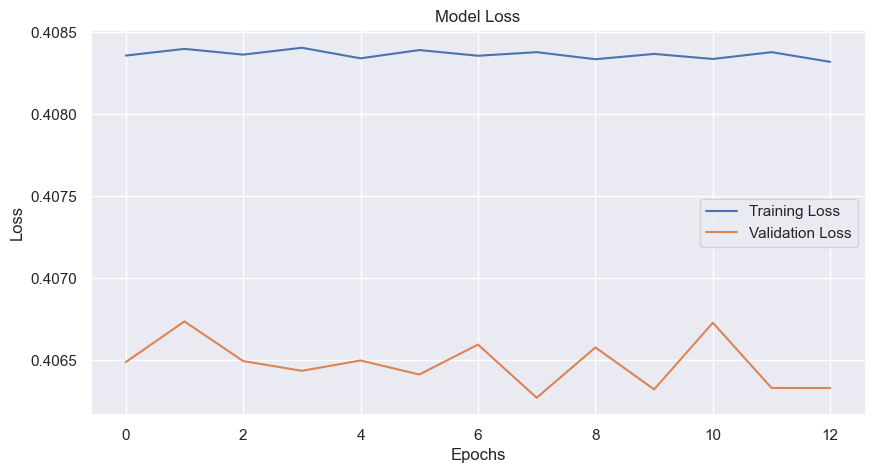

In [96]:
import matplotlib.pyplot as plt

# Plotting loss curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## COMPARISON EVALUATION METRICS

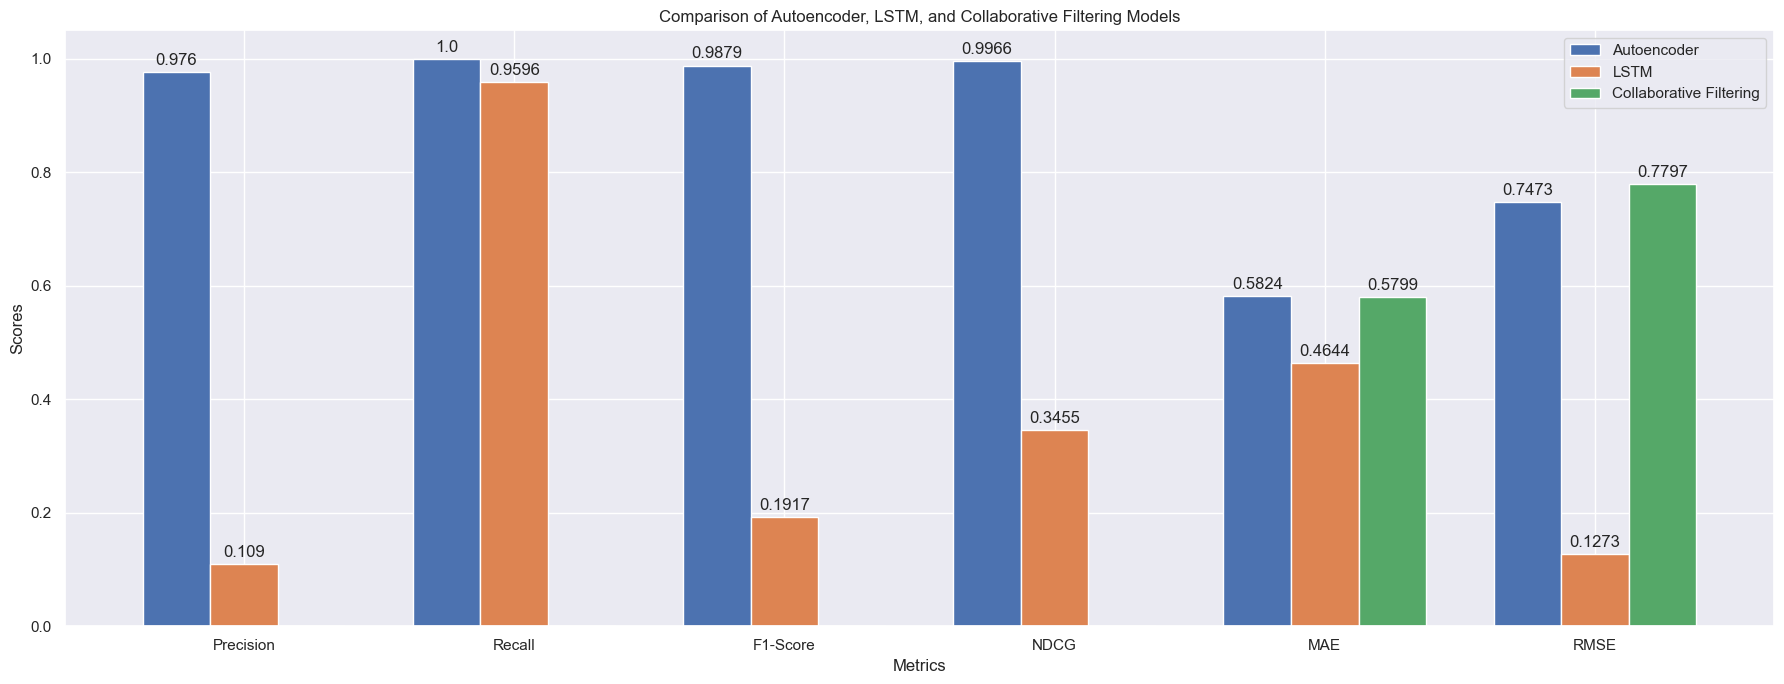

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# Autoencoder, LSTM, and Collaborative Filtering results
autoencoder_results = {
    'Precision': 0.9760434212988958,
    'Recall': 1.0,
    'F1-Score': 0.987876491759803,
    'NDCG': 0.9965892067152963,
    'MAE': 0.5824,
    'RMSE': 0.7473
}

lstm_results = {
    'Precision': np.mean(precisions),
    'Recall': np.mean(recalls),
    'F1-Score': np.mean(f1s),
    'NDCG': np.mean(ndcgs),
    'MAE': 0.4644,
    'RMSE': 0.1273
}

cf_results = {
    'MAE': 0.5799237535026954,
    'RMSE': 0.7797442693732188
}

# Labels and values
metrics = ['Precision', 'Recall', 'F1-Score', 'NDCG', 'MAE', 'RMSE']
autoencoder_values = [autoencoder_results.get(metric, 0) for metric in metrics]
lstm_values = [lstm_results.get(metric, 0) for metric in metrics]
cf_values = [cf_results.get(metric, 0) for metric in metrics]

# Bar width
bar_width = 0.25
index = np.arange(len(metrics))

# Plotting
fig, ax = plt.subplots(figsize=(18, 7))

bars1 = ax.bar(index, autoencoder_values, bar_width, label='Autoencoder')
bars2 = ax.bar(index + bar_width, lstm_values, bar_width, label='LSTM')
bars3 = ax.bar(index + 2 * bar_width, cf_values, bar_width, label='Collaborative Filtering')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Autoencoder, LSTM, and Collaborative Filtering Models')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(metrics)
ax.legend()

# Attach a text label above each bar in *bars*, displaying its height.
def autolabel(bars, show_zero=True):
    for bar in bars:
        height = bar.get_height()
        if height != 0 or show_zero:
            ax.annotate('{}'.format(round(height, 4)),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)
autolabel(bars3, show_zero=False)

fig.tight_layout()
plt.show()
